# House Price: Advanced regression technique

## 데이터 탐색

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform
from numpy import *
import seaborn as sns
%matplotlib inline
import tensorflow as tf
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib notebook

In [72]:
df = pd.read_csv('data/train.csv', sep=',', encoding='UTF-8')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
len(df)

1460

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
df.shape

(1460, 81)

In [7]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
                 ...  
BedroomAbvGr     False
KitchenAbvGr     False
KitchenQual      False
TotRmsAbvGrd     False
Functional       False
Fireplaces       False
FireplaceQu       True
GarageType        True
GarageYrBlt       True
GarageFinish      True
GarageCars       False
GarageArea       False
GarageQual 

In [10]:
#종속변수 SalePrice의 기초통계량
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Python\Anaconda3-52\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


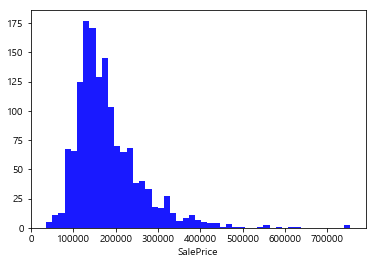

In [11]:
#집값 분포 확인
sns.distplot(df['SalePrice'],kde = False, color = 'b', hist_kws={'alpha':0.9});

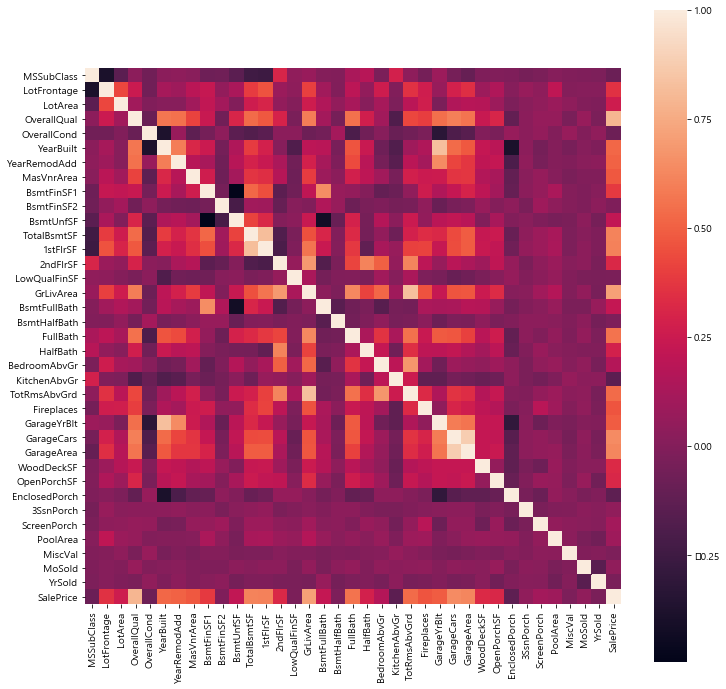

In [15]:
# ID를 제외한 수치형 변수들 간의 상관계수 확인
corr = df.select_dtypes(include = ['float64','int64']).iloc[:,1:].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,vmax=1,square=True);

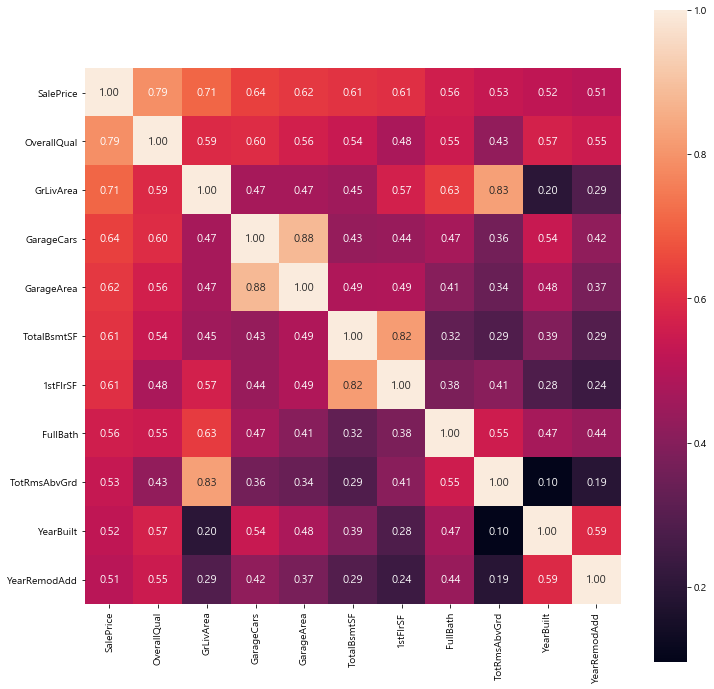

In [13]:
# SalePrice와 높은 상관관계를 지닌 변수 Top 10 매트릭스
var = 11
cols = corr.nlargest(var, 'SalePrice')['SalePrice'].index
corr = np.corrcoef(df[cols].values.T)

plt.subplots(figsize = (12, 12))
hm = sns.heatmap(corr, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 11},
                 xticklabels = cols.values, yticklabels = cols.values)
plt.show()


In [16]:
corr.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.682150,-0.468952,-0.156853,-0.039187,-0.081188,-0.054560,-0.142078,-0.298294,-0.199612,...,-0.163056,-0.116178,0.010317,-0.140172,-0.128932,-0.120944,-0.003922,-0.034707,-0.033821,-0.268209
LotFrontage,-0.682150,1.000000,0.696861,0.458377,-0.269892,0.266324,0.196254,0.444685,0.404159,-0.001474,...,0.267658,0.331089,-0.125950,0.026320,0.049539,0.280274,-0.149234,-0.052115,-0.136644,0.586682
LotArea,-0.468952,0.696861,1.000000,0.204538,-0.112452,0.070685,0.000192,0.248273,0.410450,0.160966,...,0.306394,0.154487,-0.083411,-0.032972,0.065824,0.162956,-0.063306,-0.070780,-0.117656,0.369766
OverallQual,-0.156853,0.458377,0.204538,1.000000,-0.493494,0.840035,0.833815,0.765094,0.380313,-0.295294,...,0.509867,0.608282,-0.493760,-0.045841,-0.023241,-0.008481,-0.275071,0.006037,-0.209533,0.961367
OverallCond,-0.039187,-0.269892,-0.112452,-0.493494,1.000000,-0.648686,-0.344108,-0.476677,-0.233079,0.150669,...,-0.245491,-0.298651,0.330849,0.019959,0.101778,-0.024291,0.177180,-0.022561,0.110065,-0.474182
YearBuilt,-0.081188,0.266324,0.070685,0.840035,-0.648686,1.000000,0.881460,0.649466,0.424626,-0.234811,...,0.506857,0.474354,-0.699778,0.010693,-0.132373,-0.075683,-0.229215,-0.018789,-0.111301,0.784025
YearRemodAdd,-0.054560,0.196254,0.000192,0.833815,-0.344108,0.881460,1.000000,0.531707,0.282874,-0.294470,...,0.464809,0.496147,-0.589472,0.002604,-0.164257,-0.113137,-0.218927,-0.027404,-0.089295,0.757755
MasVnrArea,-0.142078,0.444685,0.248273,0.765094,-0.476677,0.649466,0.531707,1.000000,0.454394,-0.267864,...,0.433670,0.415956,-0.426124,-0.045513,0.026631,-0.022177,-0.244522,-0.062631,-0.162052,0.801564
BsmtFinSF1,-0.298294,0.404159,0.410450,0.380313,-0.233079,0.424626,0.282874,0.454394,1.000000,0.051033,...,0.435215,0.206748,-0.320510,-0.000563,0.063666,0.188581,-0.131083,-0.099897,-0.030009,0.509466
BsmtFinSF2,-0.199612,-0.001474,0.160966,-0.295294,0.150669,-0.234811,-0.294470,-0.267864,0.051033,1.000000,...,-0.004225,-0.176580,0.119855,-0.088680,0.143261,0.059524,0.003501,-0.083686,0.066816,-0.224561


In [17]:
corr_dict = corr['SalePrice'].to_dict()
del corr_dict['SalePrice']

# SalePrice와의 상관계수를 내림차순으로 정렬
for i in sorted(corr_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*i))

OverallQual: 	0.7909816005838047
GrLivArea: 	0.7086244776126511
GarageCars: 	0.640409197258349
GarageArea: 	0.6234314389183598
TotalBsmtSF: 	0.6135805515591944
1stFlrSF: 	0.6058521846919166
FullBath: 	0.5606637627484452
TotRmsAbvGrd: 	0.5337231555820238
YearBuilt: 	0.5228973328794967
YearRemodAdd: 	0.5071009671113867
GarageYrBlt: 	0.48636167748786213
MasVnrArea: 	0.4774930470957107
Fireplaces: 	0.4669288367515242
BsmtFinSF1: 	0.38641980624215627
LotFrontage: 	0.35179909657067854
WoodDeckSF: 	0.32441344456813076
2ndFlrSF: 	0.31933380283206614
OpenPorchSF: 	0.31585622711605577
HalfBath: 	0.2841076755947784
LotArea: 	0.2638433538714063
BsmtFullBath: 	0.22712223313149718
BsmtUnfSF: 	0.214479105546969
BedroomAbvGr: 	0.1682131543007415
KitchenAbvGr: 	-0.1359073708421417
EnclosedPorch: 	-0.12857795792595636
ScreenPorch: 	0.11144657114291048
PoolArea: 	0.09240354949187278
MSSubClass: 	-0.08428413512659523
OverallCond: 	-0.0778558940486776
MoSold: 	0.04643224522381936
3SsnPorch: 	0.044583665335

### 집값(SalePrice)와 가장 높은 상관을 가지는 요소 Top 10
1. OverallQual(집 재료와 마감비율)
2. GrLivArea(지상거주공간)
3. GarageCars(차고의 수용 가능 용량)
4. GarageArea(차고평수)
5. TotalBsmtSF(지하층 총면적)
6. 1stFlrSF(1층 면적)
7. FullBath(지상층 화장실 수)
8. TotRmsAbvGrd(전체 방 수준)
9. YearBuilt(준공일자)
10. YearRemodAdd(리모델링 연도)

## 데이터 시각화
### - 수치형 데이터

C:\Python\Anaconda3-52\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


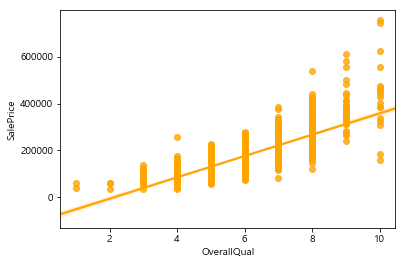

In [18]:
# SalePrice에 대한 OverallQuall의 회귀선

sns.regplot(x='OverallQual', y='SalePrice', data=df, color='Orange');

<Figure size 432x288 with 0 Axes>

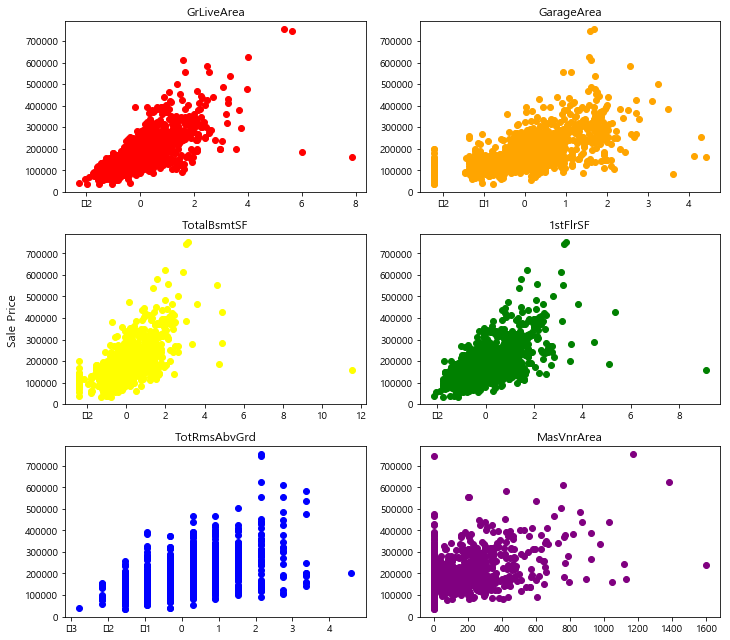

In [67]:
# 높은 상관관계를 지닌 면적 관련 피쳐의 SalesPrice에 대한 산점도

plt.figure(1)
f, axarr = plt.subplots(3,2,figsize=(10,9))
price = df.SalePrice.values
axarr[0,0].scatter(df.GrLivArea.values, price, color='red')
axarr[0,0].set_title('GrLiveArea')
axarr[0,1].scatter(df.GarageArea.values, price, color='orange')
axarr[0,1].set_title('GarageArea')
axarr[1,0].scatter(df.TotalBsmtSF.values, price, color='yellow')
axarr[1,0].set_title('TotalBsmtSF')
axarr[1,1].scatter(df['1stFlrSF'].values, price, color='green')
axarr[1,1].set_title('1stFlrSF')
axarr[2,0].scatter(df.TotRmsAbvGrd.values, price, color='blue')
axarr[2,0].set_title('TotRmsAbvGrd')
axarr[2,1].scatter(df.MasVnrArea.values, price, color='purple')
axarr[2,1].set_title('MasVnrArea')
f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize=12)
plt.tight_layout()
plt.show();

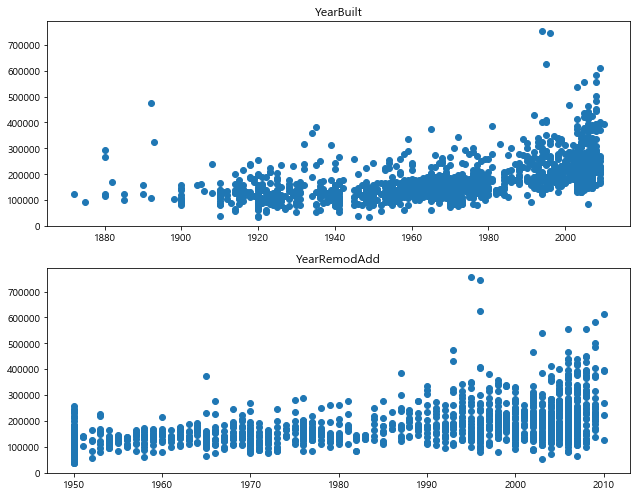

In [20]:
#건설(리모델링) 연도와 SalePrice에 대한 산점도

fig = plt.figure(2,figsize=(9,7))
plt.subplot(211)
plt.scatter(df.YearBuilt.values, price)
plt.title('YearBuilt')

plt.subplot(212)
plt.scatter(df.YearRemodAdd.values, price)
plt.title('YearRemodAdd')

f.text(-0.01, 0.5, 'Sale Price', va='center', rotation='vertical', fontsize=12)

plt.tight_layout()

## 데이터 시각화
### - 카테고리 데이터

C:\Python\Anaconda3-52\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


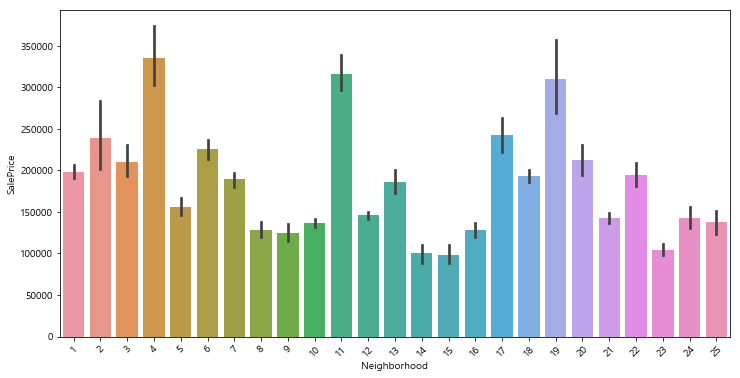

In [69]:
plt.figure(figsize=(12,6))
sns.barplot(x='Neighborhood', y='SalePrice', data=df)
xt=plt.xticks(rotation=45)

지역에 따라 집값의 큰 차이를 보임

### 집값과 관련한 피쳐와의 상관관계
- 판매 시점
- 집 상태
- 시설 퀄리티 등

C:\Python\Anaconda3-52\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


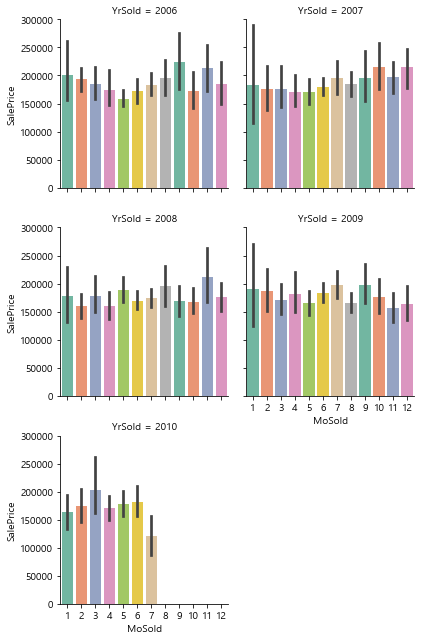

In [22]:
g = sns.FacetGrid(df, col='YrSold', col_wrap= 2)
g.map(sns.barplot, 'MoSold', 'SalePrice', palette='Set2', order=range(1,13)).set(ylim = (0,300000))
plt.tight_layout()

집값과 판매 연월은 관계가 적음

C:\Python\Anaconda3-52\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


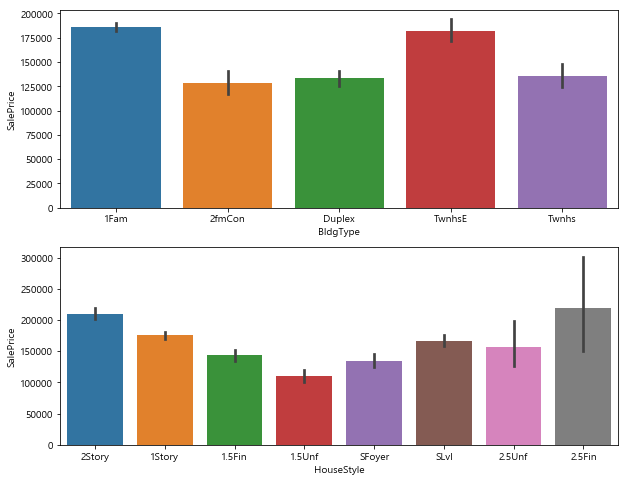

In [23]:
# Housing Style
fig, ax = plt.subplots(2,1,figsize=(10,8))
sns.barplot(x='BldgType', y='SalePrice', data=df, ax=ax[0])
sns.barplot(x='HouseStyle', y='SalePrice', data=df, ax=ax[1])

1층보다는 2층이, 단독주택과 타운형 빌라의 선호도가 높음을 알 수 있음

C:\Python\Anaconda3-52\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Python\Anaconda3-52\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Python\Anaconda3-52\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


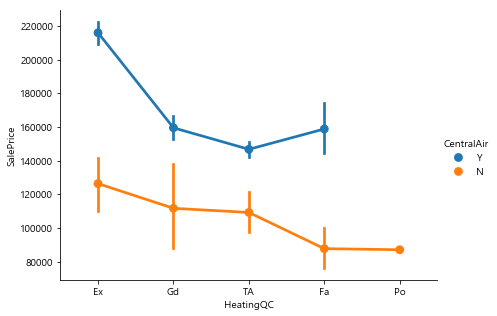

In [24]:
sns.factorplot('HeatingQC', 'SalePrice', hue='CentralAir', data=df, size=4.5, aspect=1.4)

C:\Python\Anaconda3-52\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


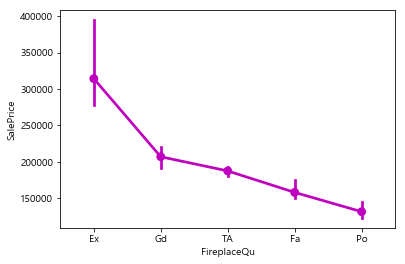

In [25]:
sns.pointplot('FireplaceQu', 'SalePrice', data=df, color ='m',
              estimator =np.median, order=['Ex','Gd','TA','Fa','Po'],size=4.5, aspect=1.35)

중앙난방 여부와 벽난로의 상태는 가격에 많은 영향을 끼침

## 불필요한 피쳐 제거

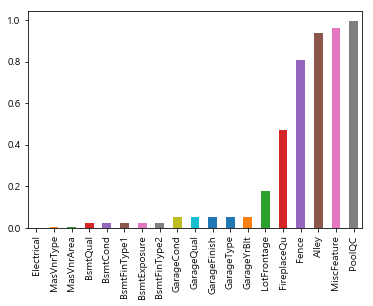

In [26]:
# nan 값이 얼마나 있는지 column별로 확인하기
Missing = df.isnull().sum()
# 전체 data 개수 대비 NaN의 비율 = Missing Ratio
MissingRatio = df.isnull().sum() / len(df)
MissingRatio = MissingRatio[MissingRatio > 0]

#그래프화
MissingRatio.sort_values(inplace=True)
MissingRatio.plot.bar()

In [27]:
#NaN값이 너무 많거나 상관이 없는 열 삭제
df.drop('Alley', axis=1, inplace=True)
df.drop('PoolQC', axis=1, inplace=True)
df.drop('MiscFeature', axis=1, inplace=True)
df.drop('Fence', axis=1, inplace=True)
df.drop('PoolArea', axis=1, inplace=True)
df.drop('3SsnPorch', axis=1, inplace=True)
df.drop('YrSold', axis=1, inplace=True)
df.drop('MoSold', axis=1, inplace=True)
df.drop('LowQualFinSF', axis=1, inplace=True)
df.drop('MiscVal', axis=1, inplace=True)
df.drop('BsmtHalfBath', axis=1, inplace=True)
df.drop('BsmtFinSF2', axis=1, inplace=True)

## 데이터 유형별로 분류
    - 수치형
    - 순서형
    - 카테고리형

In [28]:
cols_numerical = []
for col in df:
    if df[col].dtype == ('int64'or'float64'):
        cols_numerical.append(col)
        
cols_numerical = cols_numerical[1:-1]
cols_ordinal = ['Street','LotShape','Utilities','LandSlope','OverallQual',
                'OverallCond','KitchenQual', 'FireplaceQu',
                'HeatingQC','PavedDrive','ExterQual', 'ExterCond',
               'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                'BsmtFinType2', 'GarageFinish','GarageQual','GarageCond'
                ]
cols_categorical = ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
                    'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
                    'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                    'Foundation', 'Heating','CentralAir',
                    'Electrical','GarageQual', 'SaleType', 'SaleCondition','GarageType']

In [29]:
cols_numerical[:10]

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF']

In [30]:
dtype(df['SalePrice'])

dtype('int64')

## 결측치 대치
- 수치형으로 대치
- 카테고리형은 결측치를 하나의 unique 값으로 보고 0으로 대치
- 순서형은 data descriptionㅇ 따라 NA = 0일 경우 0으로, 설명이 없을 경우 0.5로 대치

In [31]:
# numerical의 NA값은 모두 0으로 대치
df[cols_numerical] = df[cols_numerical].fillna(0)
# categorical은 결측치를 하나의 unique값으로 보고 0에 대응시킴
df[cols_categorical] = df[cols_categorical].fillna(0)
# ordinal은 data description에 따라 NA = 0인 경우 0 처리
df[cols_ordinal[:12]] = df[cols_ordinal[:12]].fillna(0)
# 설명이 없을 경우 0.5로 처리
df[cols_ordinal[12:]] = df[cols_ordinal[12:]].fillna(0.5)

In [32]:
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

In [33]:
df['LotFrontage'].head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     0.0
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

In [34]:
df[cols_numerical].info()
df[cols_categorical].info()
df[cols_ordinal].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
MSSubClass       1460 non-null int64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
BsmtFinSF1       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
WoodDeckSF       1460 non-null int64
OpenPorchSF      1460 non-null int64
EnclosedPorch    1460 non-null int64
Scree

In [35]:
df.isnull().sum().head(10)

Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
LotShape       0
LandContour    0
Utilities      0
LotConfig      0
dtype: int64

## 카테고리와 순서형 데이터 라벨링
- 카테고리는 int 값으로 라벨링
- 순서형은 0과 1 사이의 값으로 라벨링

In [36]:
# 카테고리형
for col in df[cols_categorical]:
    val = 1
    temp_dict = {}
    for unique in df[col].unique():
        if unique != 0:
            temp_dict[unique] = val
            df[col][df[col] == unique] = val
            val += 1
    print(temp_dict)
# df2.loc[:,['Foundation','Heating', 'CentralAir', 'Electrical']]

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


{'RL': 1, 'RM': 2, 'C (all)': 3, 'FV': 4, 'RH': 5}
{'Lvl': 1, 'Bnk': 2, 'Low': 3, 'HLS': 4}
{'Inside': 1, 'FR2': 2, 'Corner': 3, 'CulDSac': 4, 'FR3': 5}
{'CollgCr': 1, 'Veenker': 2, 'Crawfor': 3, 'NoRidge': 4, 'Mitchel': 5, 'Somerst': 6, 'NWAmes': 7, 'OldTown': 8, 'BrkSide': 9, 'Sawyer': 10, 'NridgHt': 11, 'NAmes': 12, 'SawyerW': 13, 'IDOTRR': 14, 'MeadowV': 15, 'Edwards': 16, 'Timber': 17, 'Gilbert': 18, 'StoneBr': 19, 'ClearCr': 20, 'NPkVill': 21, 'Blmngtn': 22, 'BrDale': 23, 'SWISU': 24, 'Blueste': 25}
{'Norm': 1, 'Feedr': 2, 'PosN': 3, 'Artery': 4, 'RRAe': 5, 'RRNn': 6, 'RRAn': 7, 'PosA': 8, 'RRNe': 9}
{'Norm': 1, 'Artery': 2, 'RRNn': 3, 'Feedr': 4, 'PosN': 5, 'PosA': 6, 'RRAn': 7, 'RRAe': 8}
{'1Fam': 1, '2fmCon': 2, 'Duplex': 3, 'TwnhsE': 4, 'Twnhs': 5}
{'2Story': 1, '1Story': 2, '1.5Fin': 3, '1.5Unf': 4, 'SFoyer': 5, 'SLvl': 6, '2.5Unf': 7, '2.5Fin': 8}
{'Gable': 1, 'Hip': 2, 'Gambrel': 3, 'Mansard': 4, 'Flat': 5, 'Shed': 6}
{'CompShg': 1, 'WdShngl': 2, 'Metal': 3, 'WdShake': 4, 

In [37]:
#순서형
df_temp = df[['Street','LotShape','Utilities','LandSlope','OverallQual',
                'OverallCond','KitchenQual', 'FireplaceQu',
                'HeatingQC','PavedDrive','ExterQual', 'ExterCond',
                'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                'BsmtFinType2', 'GarageFinish','GarageQual','GarageCond','Functional']]

In [38]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [39]:
df['Street'][df['Street']=='Pave'] = (2 - 1/2) /2
df['Street'][df['Street']=='Grvl'] = (1 - 1/2) /2

df['Street'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([0.75, 0.25], dtype=object)

In [40]:
df['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [41]:
df['LotShape'][df['LotShape']=='Reg'] = (4 - 1/2) /4
df['LotShape'][df['LotShape']=='IR1'] = (3 - 1/2) /4
df['LotShape'][df['LotShape']=='IR2'] = (2 - 1/2) /4
df['LotShape'][df['LotShape']=='IR3'] = (1 - 1/2) /4

df['LotShape'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.875, 0.625, 0.375, 0.125], dtype=object)

In [42]:
df['OverallQual'].unique()
#,'OverallQual','OverallCond','KitchenQual', 'FireplaceQu',
#     'HeatingQC','PavedDrive','ExterQual', 'ExterCond',
#     'Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
#     'BsmtFinType2', 'GarageFinish','GarageQual','GarageCond',
#     'PoolQC', 'Fence'

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [43]:
# 순서형
df_temp = df[['KitchenQual', 'FireplaceQu',
                'HeatingQC','PavedDrive','ExterQual', 'ExterCond',
               'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                'BsmtFinType2', 'GarageFinish','GarageQual','GarageCond']]
for col in df_temp:    
    df[col][df[col] == 'Ex'] = (5 - 1/2) / 5
    df[col][df[col] == 'Gd'] = (4 - 1/2) / 5
    df[col][df[col] == 'TA'] = (3 - 1/2) / 5
    df[col][df[col] == 'Fa'] = (2 - 1/2) / 5
    df[col][df[col] == 'Po'] = (1 - 1/2) / 5
    print(df[col].unique())

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be

[0.7 0.5 0.9 0.3]
[0 0.5 0.7 0.3 0.9 0.1]
[0.9 0.7 0.5 0.3 0.1]
['Y' 'N' 'P']
[0.7 0.5 0.9 0.3]
[0.5 0.7 0.3 0.1 0.9]
[0.7 0.5 0.9 0.3]
[0.5 0.7 0.3 0.1]
['No' 0.7 'Mn' 'Av' 0.5]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 0.5 'LwQ']
['Unf' 'BLQ' 0.5 'ALQ' 'Rec' 'LwQ' 'GLQ']
['RFn' 'Unf' 'Fin' 0.5]
[1 2 3 0 4 5]
[0.5 0.3 0.7 0.1 0.9]


In [44]:
df['Utilities'][df['Utilities']=='AllPub'] = (2 - 1/2) /2
df['Utilities'][df['Utilities']=='NoSeWa'] = (1 - 1/2) /2

df['LandSlope'][df['LandSlope']=='Gtl'] = (3 - 1/2) /3
df['LandSlope'][df['LandSlope']=='Mod'] = (2 - 1/2) /3
df['LandSlope'][df['LandSlope']=='Sev'] = (1 - 1/2) /3

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:5: S

In [45]:
df['Utilities'].unique()

array([0.75, 0.25], dtype=object)

In [46]:
df['LandSlope'].unique()

array([0.8333333333333334, 0.5, 0.16666666666666666], dtype=object)

In [47]:
df['OverallQual'][df['OverallQual']==10] = (10 - 1/2) /10
df['OverallQual'][df['OverallQual']==9] = (9 - 1/2) /10
df['OverallQual'][df['OverallQual']==8] = (8 - 1/2) /10
df['OverallQual'][df['OverallQual']==7] = (7 - 1/2) /10
df['OverallQual'][df['OverallQual']==6] = (6 - 1/2) /10
df['OverallQual'][df['OverallQual']==5] = (5 - 1/2) /10
df['OverallQual'][df['OverallQual']==4] = (4 - 1/2) /10
df['OverallQual'][df['OverallQual']==3] = (3 - 1/2) /10
df['OverallQual'][df['OverallQual']==2] = (2 - 1/2) /10
df['OverallQual'][df['OverallQual']==1] = (1 - 1/2) /10

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [48]:
df['OverallQual'].unique()

array([0.65, 0.55, 0.75, 0.45, 0.85, 0.35, 0.95, 0.25, 0.05, 0.15])

In [49]:
df['OverallCond'][df['OverallCond']==10] = (10 - 1/2) /10
df['OverallCond'][df['OverallCond']==9] = (9 - 1/2) /10
df['OverallCond'][df['OverallCond']==8] = (8 - 1/2) /10
df['OverallCond'][df['OverallCond']==7] = (7 - 1/2) /10
df['OverallCond'][df['OverallCond']==6] = (6 - 1/2) /10
df['OverallCond'][df['OverallCond']==5] = (5 - 1/2) /10
df['OverallCond'][df['OverallCond']==4] = (4 - 1/2) /10
df['OverallCond'][df['OverallCond']==3] = (3 - 1/2) /10
df['OverallCond'][df['OverallCond']==2] = (2 - 1/2) /10
df['OverallCond'][df['OverallCond']==1] = (1 - 1/2) /10

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [50]:
df['PavedDrive'][df['PavedDrive']=='Y'] = (3 - 1/2) /3
df['PavedDrive'][df['PavedDrive']=='P'] = (2 - 1/2) /3
df['PavedDrive'][df['PavedDrive']=='N'] = (1 - 1/2) /3
df['PavedDrive'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.8333333333333334, 0.16666666666666666, 0.5], dtype=object)

In [51]:
df['BsmtExposure'][df['BsmtExposure']=='No'] = (5 - 1/2) /5
df['BsmtExposure'][df['BsmtExposure']== 0.7] = (4 - 1/2) /5
df['BsmtExposure'][df['BsmtExposure']=='Mn'] = (3 - 1/2) /5
df['BsmtExposure'][df['BsmtExposure']=='Av'] = (2 - 1/2) /5
df['BsmtExposure'][df['BsmtExposure']== 0] = (1 - 1/2) /5
df['BsmtExposure'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.9, 0.7, 0.5, 0.3], dtype=object)

In [52]:
df['BsmtFinType1'][df['BsmtFinType1']=='GLQ'] = (7 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']== 'ALQ'] = (6 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']=='Unf'] = (5 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']=='Rec'] = (4 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']== 'BLQ'] = (3 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']== 'LwQ'] = (2 - 1/2) /7
df['BsmtFinType1'][df['BsmtFinType1']== 0] = (1 - 1/2) /7

df['BsmtFinType1'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.9285714285714286, 0.7857142857142857, 0.6428571428571429, 0.5,
       0.35714285714285715, 0.21428571428571427], dtype=object)

In [53]:
df['BsmtFinType2'][df['BsmtFinType2']=='GLQ'] = (7 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']== 'ALQ'] = (6 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']=='BLQ'] = (5 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']=='Rec'] = (4 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']== 'LwQ'] = (3 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']== 'Unf'] = (2 - 1/2) /7
df['BsmtFinType2'][df['BsmtFinType2']== 0] = (1 - 1/2) /7

df['BsmtFinType2'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.21428571428571427, 0.6428571428571429, 0.5, 0.7857142857142857,
       0.35714285714285715, 0.9285714285714286], dtype=object)

In [54]:
df['GarageFinish'][df['GarageFinish']=='Fin'] = (4 - 1/2) /4
df['GarageFinish'][df['GarageFinish']=='RFn'] = (3 - 1/2) /4
df['GarageFinish'][df['GarageFinish']=='Unf'] = (2 - 1/2) /4
df['GarageFinish'][df['GarageFinish']==0] = (1 - 1/2) /4

df['GarageFinish'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.625, 0.375, 0.875, 0.5], dtype=object)

In [55]:
df['GarageQual'].unique()

array([1, 2, 3, 0, 4, 5], dtype=object)

In [56]:
df['GarageQual'] = (df['GarageQual']-1/2)/5

In [57]:
df['GarageQual'][df['GarageQual']== -0.1] = 0
df['GarageQual'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([0.1, 0.3, 0.5, 0, 0.7, 0.9], dtype=object)

In [58]:
df['Functional'][df['Functional']=='Typ'] = (8 - 1/2) /8
df['Functional'][df['Functional']== 'Min1'] = (7 - 1/2) /8
df['Functional'][df['Functional']=='Min2'] = (6 - 1/2) /8
df['Functional'][df['Functional']=='Mod'] = (5 - 1/2) /8
df['Functional'][df['Functional']== 'Maj1'] = (4 - 1/2) /8
df['Functional'][df['Functional']== 'Maj2'] = (3 - 1/2) /8
df['Functional'][df['Functional']== 'Sev'] = (2 - 1/2) /8
df['Functional'][df['Functional']=='Sal'] = (1 - 1/2) /8

df['Functional'].unique()

C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Python\Anaconda3-52\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Python\Anaconda3-52\li

array([0.9375, 0.8125, 0.4375, 0.6875, 0.5625, 0.3125, 0.1875],
      dtype=object)

In [59]:
cols_numerical[:10]

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF']

## 표준화
정확히는 Standardization: (요소값 - 평균)/표준편차 <p>

In [60]:
# 수치형 데이터
for col in cols_numerical:
    df[col] = (df[col] - df[col].mean()) / df[col].std()
    
df[cols_numerical].head(10)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,0.073350,-0.207071,0.651256,-0.517023,1.050634,0.878367,0.575228,-0.944267,-0.459145,-0.793162,...,0.163723,-0.211381,0.911897,-0.950901,0.311618,0.350880,-0.751918,0.216429,-0.359202,-0.270116
1,-0.872264,-0.091855,-0.071812,2.178881,0.156680,-0.429430,1.171591,-0.641008,0.466305,0.257052,...,0.163723,-0.211381,-0.318574,0.600289,0.311618,-0.060710,1.625638,-0.704242,-0.359202,-0.270116
2,0.073350,0.073455,0.651256,-0.517023,0.984415,0.829930,0.092875,-0.301540,-0.313261,-0.627611,...,0.163723,-0.211381,-0.318574,0.600289,0.311618,0.631510,-0.751918,-0.070337,-0.359202,-0.270116
3,0.309753,-0.096864,0.651256,-0.517023,-1.862993,-0.720051,-0.499103,-0.061648,-0.687089,-0.521555,...,0.163723,-0.211381,0.296662,0.600289,1.649742,0.790533,-0.751918,-0.175988,4.091122,-0.270116
4,0.073350,0.375020,1.374324,-0.517023,0.951306,0.733056,0.463410,-0.174805,0.199611,-0.045596,...,1.389547,-0.211381,1.527133,0.600289,1.649742,1.697903,0.779930,0.563567,-0.359202,-0.270116
5,-0.163054,0.360493,-0.794879,-0.517023,0.719540,0.490872,0.632233,-1.138896,-0.595911,-0.948366,...,-2.287924,-0.211381,-0.933810,-0.950901,0.311618,0.032833,-0.432783,-0.251453,-0.359202,-0.270116
6,-0.872264,-0.043364,1.374324,-0.517023,1.083743,0.975241,2.028862,-0.566325,1.432785,1.374522,...,0.163723,-0.211381,0.296662,0.600289,0.311618,0.762470,1.282568,0.156057,-0.359202,-0.270116
7,0.073350,-0.013508,0.651256,0.381612,0.057352,-0.574741,0.910682,-0.794901,0.112993,-0.143892,...,0.163723,-0.211381,0.296662,2.151479,0.311618,0.051542,1.123000,2.374723,3.371217,-0.270116
8,-0.163054,-0.440508,0.651256,-0.517023,-1.333243,-1.688790,-0.972685,0.870759,-0.240320,-0.363764,...,-1.062101,4.327097,0.911897,2.151479,0.311618,-0.023293,-0.033864,-0.704242,2.994902,-0.270116
9,3.146594,-0.310264,-0.794879,0.381612,-1.068368,-1.688790,0.893142,-0.966898,-0.151422,-0.221494,...,-1.062101,4.327097,-0.933810,2.151479,-1.026506,-1.253387,-0.751918,-0.643870,-0.359202,-0.270116


In [61]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,1,0.073350,1,65.0,-0.207071,0.75,0.875,1,0.75,1,...,0.1,0.5,0.833333,-0.751918,0.216429,-0.359202,-0.270116,1,1,208500
1,2,-0.872264,1,80.0,-0.091855,0.75,0.875,1,0.75,2,...,0.1,0.5,0.833333,1.625638,-0.704242,-0.359202,-0.270116,1,1,181500
2,3,0.073350,1,68.0,0.073455,0.75,0.625,1,0.75,1,...,0.1,0.5,0.833333,-0.751918,-0.070337,-0.359202,-0.270116,1,1,223500
3,4,0.309753,1,60.0,-0.096864,0.75,0.625,1,0.75,3,...,0.1,0.5,0.833333,-0.751918,-0.175988,4.091122,-0.270116,1,2,140000
4,5,0.073350,1,84.0,0.375020,0.75,0.625,1,0.75,2,...,0.1,0.5,0.833333,0.779930,0.563567,-0.359202,-0.270116,1,1,250000
5,6,-0.163054,1,85.0,0.360493,0.75,0.625,1,0.75,1,...,0.1,0.5,0.833333,-0.432783,-0.251453,-0.359202,-0.270116,1,1,143000
6,7,-0.872264,1,75.0,-0.043364,0.75,0.875,1,0.75,1,...,0.1,0.5,0.833333,1.282568,0.156057,-0.359202,-0.270116,1,1,307000
7,8,0.073350,1,0.0,-0.013508,0.75,0.625,1,0.75,3,...,0.1,0.5,0.833333,1.123000,2.374723,3.371217,-0.270116,1,1,200000
8,9,-0.163054,2,51.0,-0.440508,0.75,0.875,1,0.75,1,...,0.3,0.5,0.833333,-0.033864,-0.704242,2.994902,-0.270116,1,2,129900
9,10,3.146594,1,50.0,-0.310264,0.75,0.875,1,0.75,3,...,0.5,0.5,0.833333,-0.751918,-0.643870,-0.359202,-0.270116,1,1,118000


In [62]:
df.to_csv('./data/HousePrice_preprocessing_full_ver7.csv', sep=',',index =False, encoding='UTF-8')